<a href="https://colab.research.google.com/github/daniela2001-png/actividad_3_IA/blob/main/Actividad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision tree applied to a multiclass dataset :)


We decided to use this method because the dataset was quite striking for us, as we thought it would be fun to do something different, thinking and taking into account your recommendation.

In [ ]:
# Import the needed libraries

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Get the data from the remote dataset

df = pd.read_csv("https://raw.githubusercontent.com/daniela2001-png/actividad_3_IA/main/Student_Performance.csv")

In [ ]:
# Knowing the number of rows and columns of the dataset.
df.shape

(10000, 6)

In [ ]:
# Knowing the name of the columns
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
# Show the first rows
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# Havemore details of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
# Count number of distinct elements
df.nunique()

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

In [ ]:
# Check for missing values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
# Calculate summary statistics
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
corellation = df.corr()

<ipython-input-231-3a52738c4e45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corellation = df.corr()


<Axes: >

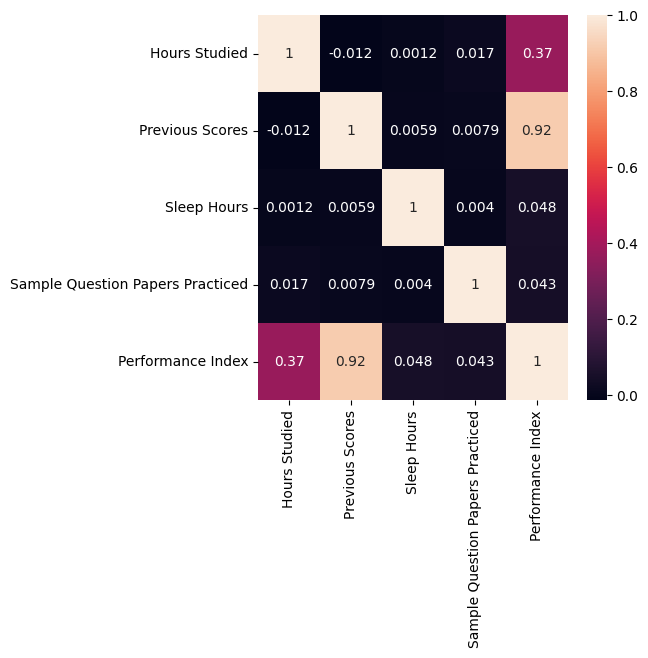

In [ ]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(corellation,xticklabels=corellation.columns,yticklabels=corellation.columns,annot=True)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

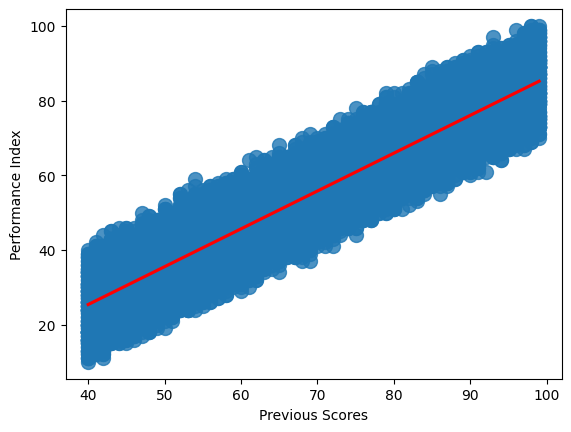

In [ ]:
# Plot the previous scores vs the performance index
sns.regplot(x=df['Previous Scores'],y=df['Performance Index'], scatter_kws={'s': 100}, line_kws={'color': 'red'})

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

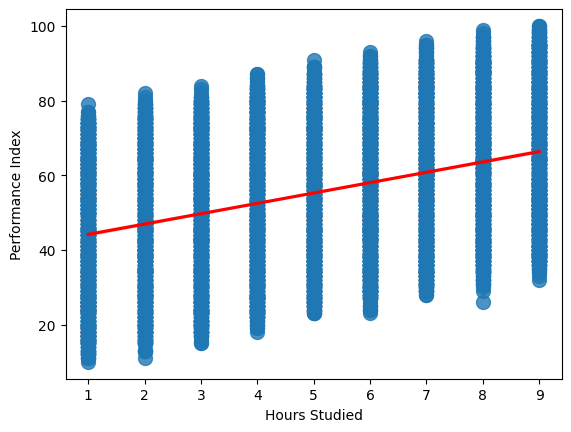

In [ ]:
# Now we plot the hours studied vs the performance index
sns.regplot(x=df['Hours Studied'],y=df['Performance Index'], scatter_kws={'s': 100}, line_kws={'color': 'red'})

Text(0.5, 1.0, 'box plot of Sleep Hours')

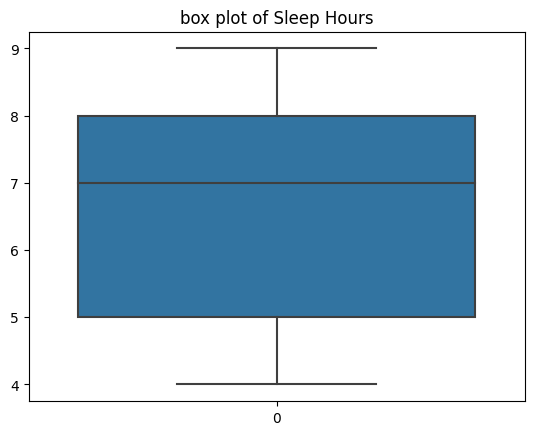

In [ ]:
# show a boxplot of the sleep hours
sns.boxplot(df['Sleep Hours']).set_title("box plot of Sleep Hours")

In [ ]:
# Creating a new column with a range of values of approved
df['Approved'] = df['Performance Index'].apply(lambda x: 1 if x > 60  else 0)
df = df.drop('Performance Index', axis = 1)

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Approved
0,7,99,Yes,9,1,1
1,4,82,No,4,2,1
2,8,51,Yes,7,2,0
3,5,52,Yes,5,2,0
4,7,75,No,8,5,1
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,0
9996,7,64,Yes,8,5,0
9997,6,83,Yes,8,5,1
9998,9,97,Yes,7,0,1


In [ ]:
# Change the Values yes or not with 1 or 0
import numpy as np

df["Extracurricular Activities"] = np.where(df["Extracurricular Activities"] == "Yes", 1, 0)

df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Approved
0,7,99,1,9,1,1
1,4,82,0,4,2,1
2,8,51,1,7,2,0
3,5,52,1,5,2,0
4,7,75,0,8,5,1
...,...,...,...,...,...,...
9995,1,49,1,4,2,0
9996,7,64,1,8,5,0
9997,6,83,1,8,5,1
9998,9,97,1,7,0,1


In [ ]:
# Define the values of the x and y, train and test
y = df['Approved']
x=data = df.drop('Approved',axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
#DecisionTreeClassifier is a supervised learning algorithm used for classification in machine learning problems. As its name suggests, it is based on the structure of a decision tree, where each internal node represents a feature of the dataset,
#each branch represents the test result and each leaf node represents the classification label.
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the decision tree:", accuracy)

Accuracy of the decision tree: 0.9546666666666667


In [ ]:
#create the correlation matrix to evaluate the accuracy of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1715   57]
 [  79 1149]]


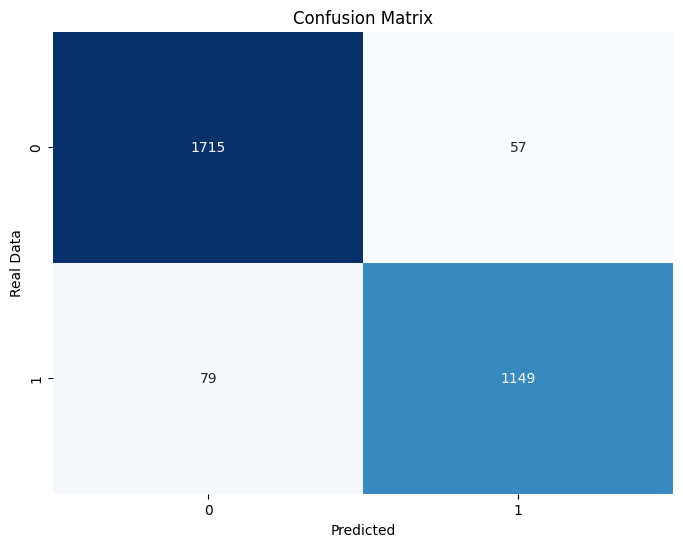

In [ ]:
# create a heat map in order to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Real Data')
plt.title('Confusion Matrix')
plt.show()

A modo de resumen del código y ejercicio anterior, se puede ver que importamos las librerías necesarias para el análisis de datos y la construcción del modelo de aprendizaje automático. Luego creamos el dataframe de rendimiento estudiantil, y posteriormente realizamos un análisis correlacional de las variables. Luego mostramos las relaciones entre las variables de estudio (puntuaciones anteriores, horas estudiadas, horas de sueño...) y el índice de rendimiento mediante gráficos de dispersión. Se creó una nueva variable binaria, "Aprobado" basada en el índice de rendimiento y se transformó la variable "Actividades extracurriculares" de categórica a binaria. Como conclusión, el modelo de árbol de decisión alcanzó una precisión del 95.433% en la clasificación de estudiantes aprobados y reprobados en base a sus características parece ser efectivo en la predicción del rendimiento estudiantil a partir de las variables disponibles. Revisando la matriz de confusión, se ve que el modelo se equivoca principalmente al clasificar estudiantes reprobados como aprobados. En general, este código demuestra la aplicación del aprendizaje automático para la clasificación de estudiantes aprobados y reprobados y también nuestro modelo de árbol de decisión tiene una buena precisión en la tarea de predicción.


As a summary of the previous code and exercise, it can be seen that we imported the necessary libraries for the data analysis and the construction of the machine learning model. We then created the student performance dataframe, and subsequently performed a correlational analysis of the variables. We then showed the relationships between the study variables (previous scores, hours studied, hours of sleep...) and the performance index using scatter plots. A new binary variable, "Pass" was created based on the performance index and the variable "Extracurricular activities" was transformed from categorical to binary. As a conclusion, the decision tree model achieved an accuracy of 95.433% in classifying passing and failing students based on their characteristics appears to be effective in predicting student achievement from the available variables. Reviewing the confusion matrix, it is seen that the model errs mainly in classifying failing students as passing. Overall, this code demonstrates the application of machine learning for the classification of pass and fail students and also our decision tree model has good accuracy in the prediction task.